In [2]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima.model import ARIMA
# import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from pmdarima import auto_arima

In [3]:

# Load the data from the .txt file
df = pd.read_csv(
    'household_power_consumption.txt', 
    sep=';',                      
    parse_dates=[[0, 1]],         
    dayfirst=True,               
    na_values='?',                
    infer_datetime_format=True   
)

df.rename(columns={'Date_Time': 'datetime'}, inplace=True)
df.datetime = pd.to_datetime(df['datetime'])
df.index = df.datetime
del df['datetime']



/var/folders/ws/_31fwyyx3g7c791b68jt9cy80000gn/T/ipykernel_76682/1813855587.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv(
/var/folders/ws/_31fwyyx3g7c791b68jt9cy80000gn/T/ipykernel_76682/1813855587.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv(


In [4]:
#check the data
print(df.head())
print(f"********** Data Types ************** /n{df.dtypes}")

                     Global_active_power  Global_reactive_power  Voltage  \
datetime                                                                   
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
datetime                                                                
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

In [8]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [5]:
#Check for missing values
df.isnull().values.any()
print(df.isnull().sum())
print((df.isnull().sum() / len(df)) * 100)

# check missing time values
time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="T")
missing_timestamps = time_range.difference(df.index)
print("Missing minute timestamps:", missing_timestamps) # So no missing time values
print(time_range)




Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64
Global_active_power      1.251844
Global_reactive_power    1.251844
Voltage                  1.251844
Global_intensity         1.251844
Sub_metering_1           1.251844
Sub_metering_2           1.251844
Sub_metering_3           1.251844
dtype: float64
Missing minute timestamps: DatetimeIndex([], dtype='datetime64[ns]', freq='min')
DatetimeIndex(['2006-12-16 17:24:00', '2006-12-16 17:25:00',
               '2006-12-16 17:26:00', '2006-12-16 17:27:00',
               '2006-12-16 17:28:00', '2006-12-16 17:29:00',
               '2006-12-16 17:30:00', '2006-12-16 17:31:00',
               '2006-12-16 17:32:00', '2006-12-16 17:33:00',
               ...
               '2010-11-26 20:53:00', '2010-11-26 20:54:00',
               '2010-11-26 20:55:00', '2010-11-26 2

/var/folders/ws/_31fwyyx3g7c791b68jt9cy80000gn/T/ipykernel_76682/2487621618.py:7: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  time_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="T")


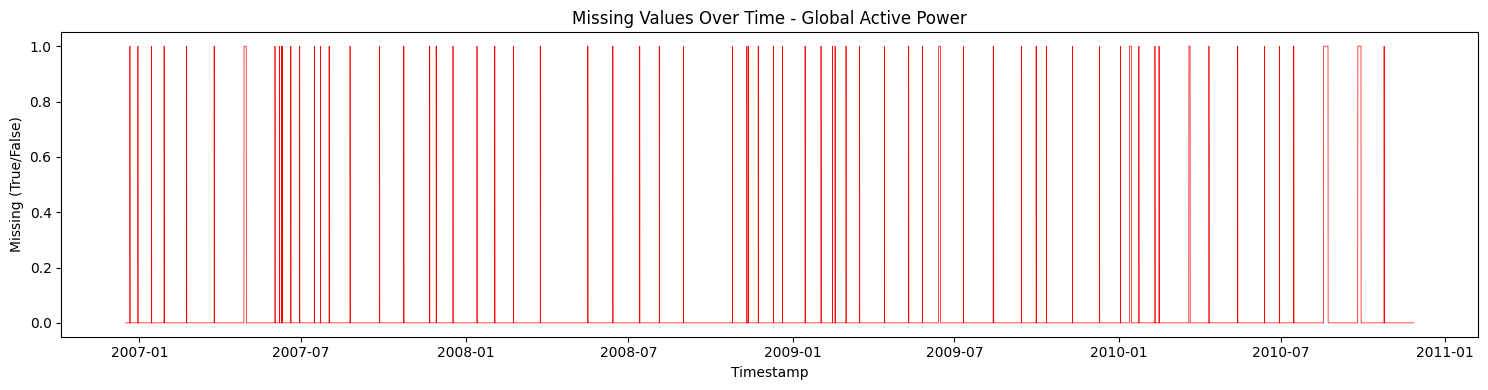

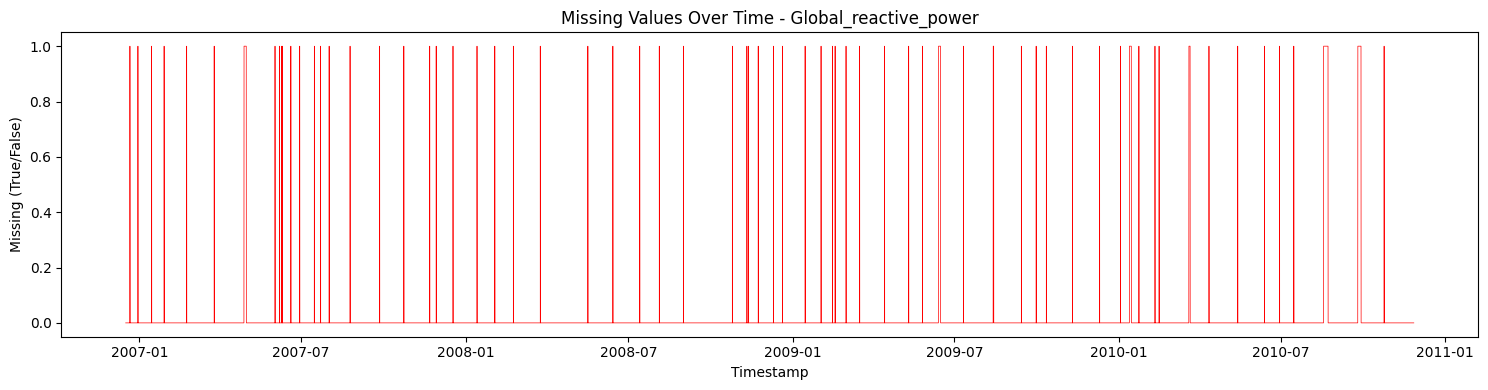

In [10]:
#Visualise missing data

# Plot a boolean mask of missing values for a selected column
missing_mask = df['Global_active_power'].isnull()
plt.figure(figsize=(15, 4))
plt.plot(df.index, missing_mask, color='red', lw=0.5)
plt.title("Missing Values Over Time - Global Active Power")
plt.ylabel("Missing (True/False)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()


missing_mask = df['Global_reactive_power'].isnull()
plt.figure(figsize=(15, 4))
plt.plot(df.index, missing_mask, color='red', lw=0.5)
plt.title("Missing Values Over Time - Global_reactive_power")
plt.ylabel("Missing (True/False)")
plt.xlabel("Timestamp")
plt.tight_layout()
plt.show()




In [6]:
#Handling missing values
df_filled = df.ffill()
print("Original missing values:")
print(df.isnull().sum())

print("\nAfter forward fill:")
print(df_filled.isnull().sum())

Original missing values:
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

After forward fill:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [7]:
df_daily = df_filled['Global_active_power'].resample('D').mean()
df_hourly = df_filled['Global_active_power'].resample('H').mean()
df_monthly = df_filled['Global_active_power'].resample('M').mean()

/var/folders/ws/_31fwyyx3g7c791b68jt9cy80000gn/T/ipykernel_76682/2783191138.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = df_filled['Global_active_power'].resample('H').mean()
/var/folders/ws/_31fwyyx3g7c791b68jt9cy80000gn/T/ipykernel_76682/2783191138.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_filled['Global_active_power'].resample('M').mean()


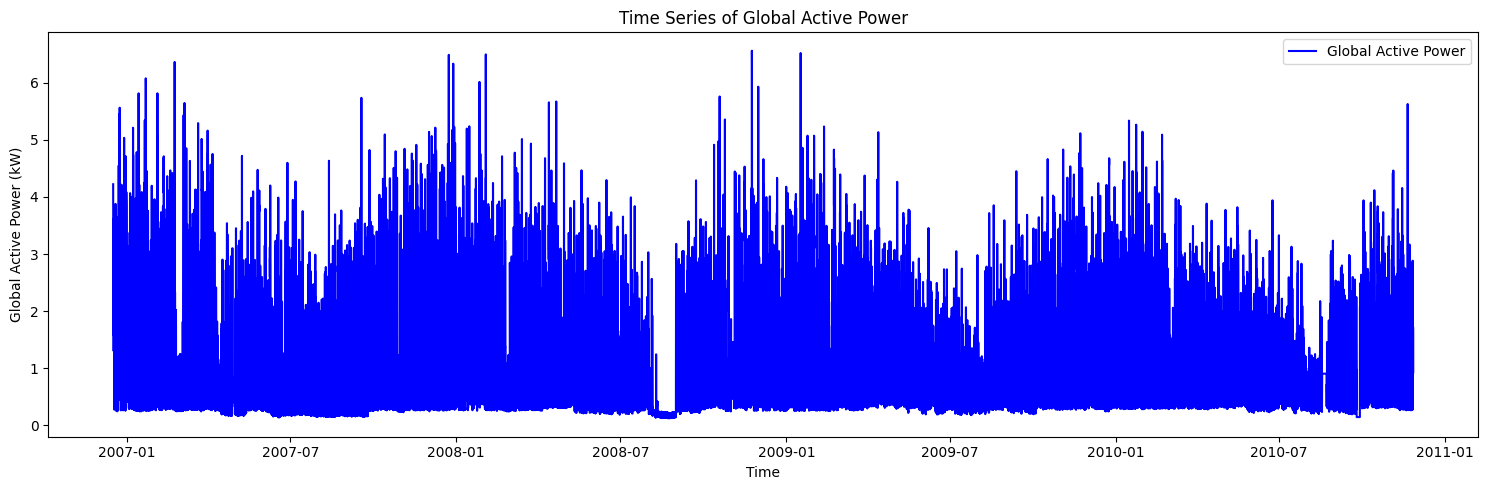

In [10]:
#Visualise ts for Global active power

plt.figure(figsize=(15, 5))
plt.plot(df_hourly.index, df_hourly, label='Global Active Power', color='blue')
plt.xlabel('Time')
plt.ylabel('Global Active Power (kW)')
plt.title('Time Series of Global Active Power')
plt.legend()
plt.tight_layout()
plt.show()


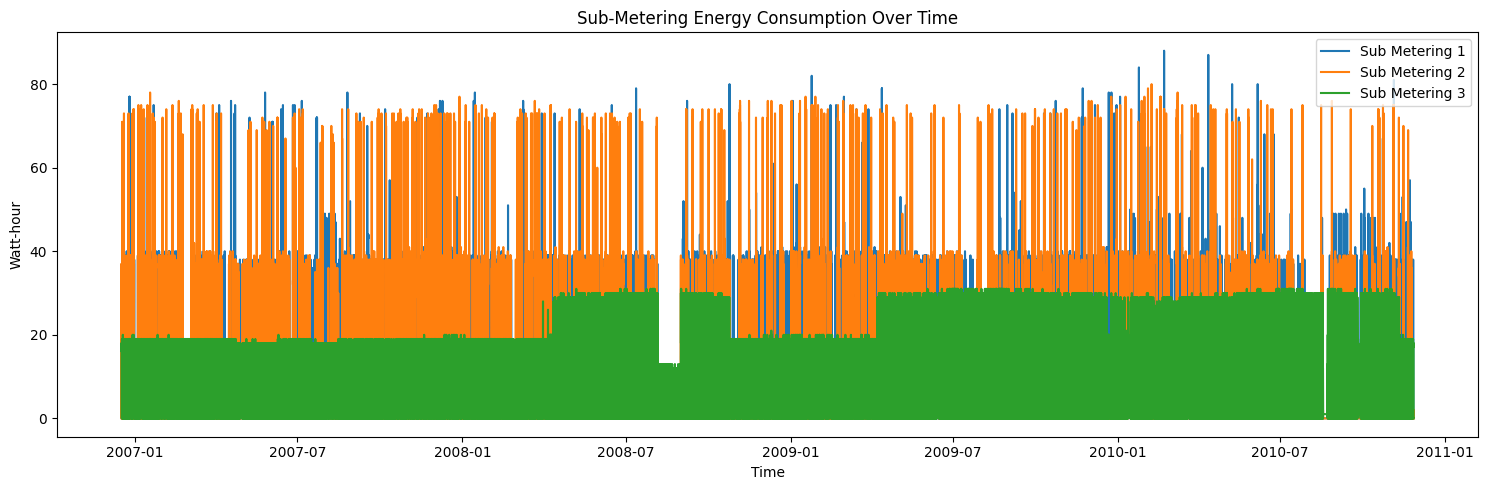

In [11]:
plt.figure(figsize=(15, 5))
plt.plot(df_filled.index, df_filled['Sub_metering_1'], label='Sub Metering 1')
plt.plot(df_filled.index, df_filled['Sub_metering_2'], label='Sub Metering 2')
plt.plot(df_filled.index, df_filled['Sub_metering_3'], label='Sub Metering 3')
plt.xlabel('Time')
plt.ylabel('Watt-hour')
plt.title('Sub-Metering Energy Consumption Over Time')
plt.legend()
plt.tight_layout()
plt.show()


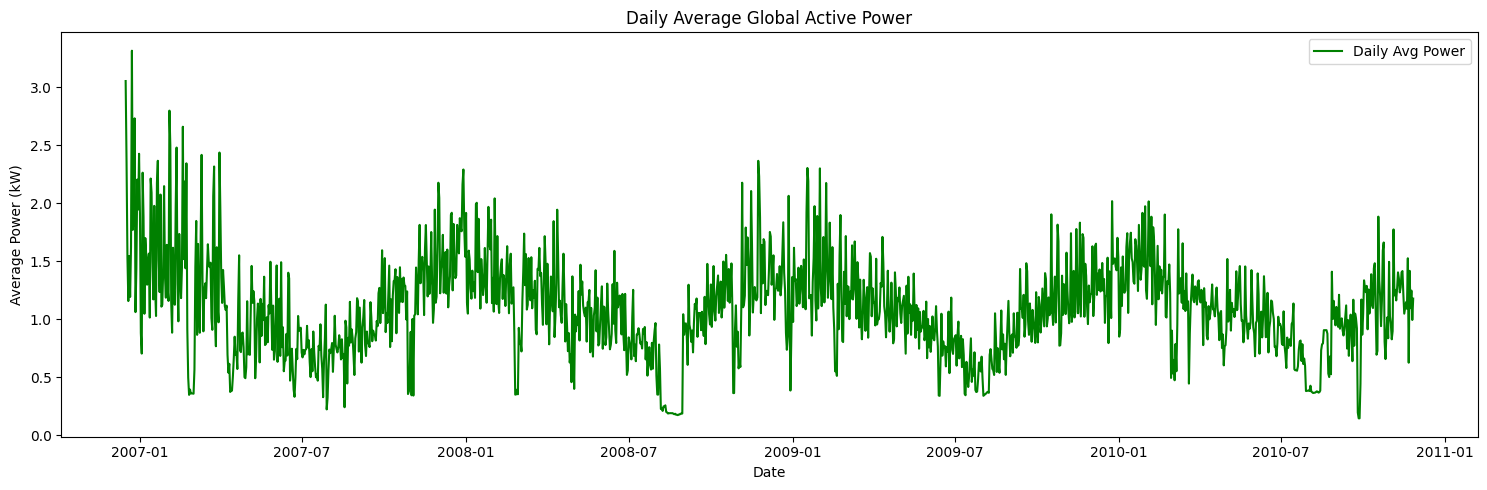

In [12]:


plt.figure(figsize=(15, 5))
plt.plot(df_daily.index, df_daily, label='Daily Avg Power', color='green')
plt.xlabel('Date')
plt.ylabel('Average Power (kW)')
plt.title('Daily Average Global Active Power')
plt.legend()
plt.tight_layout()
plt.show()


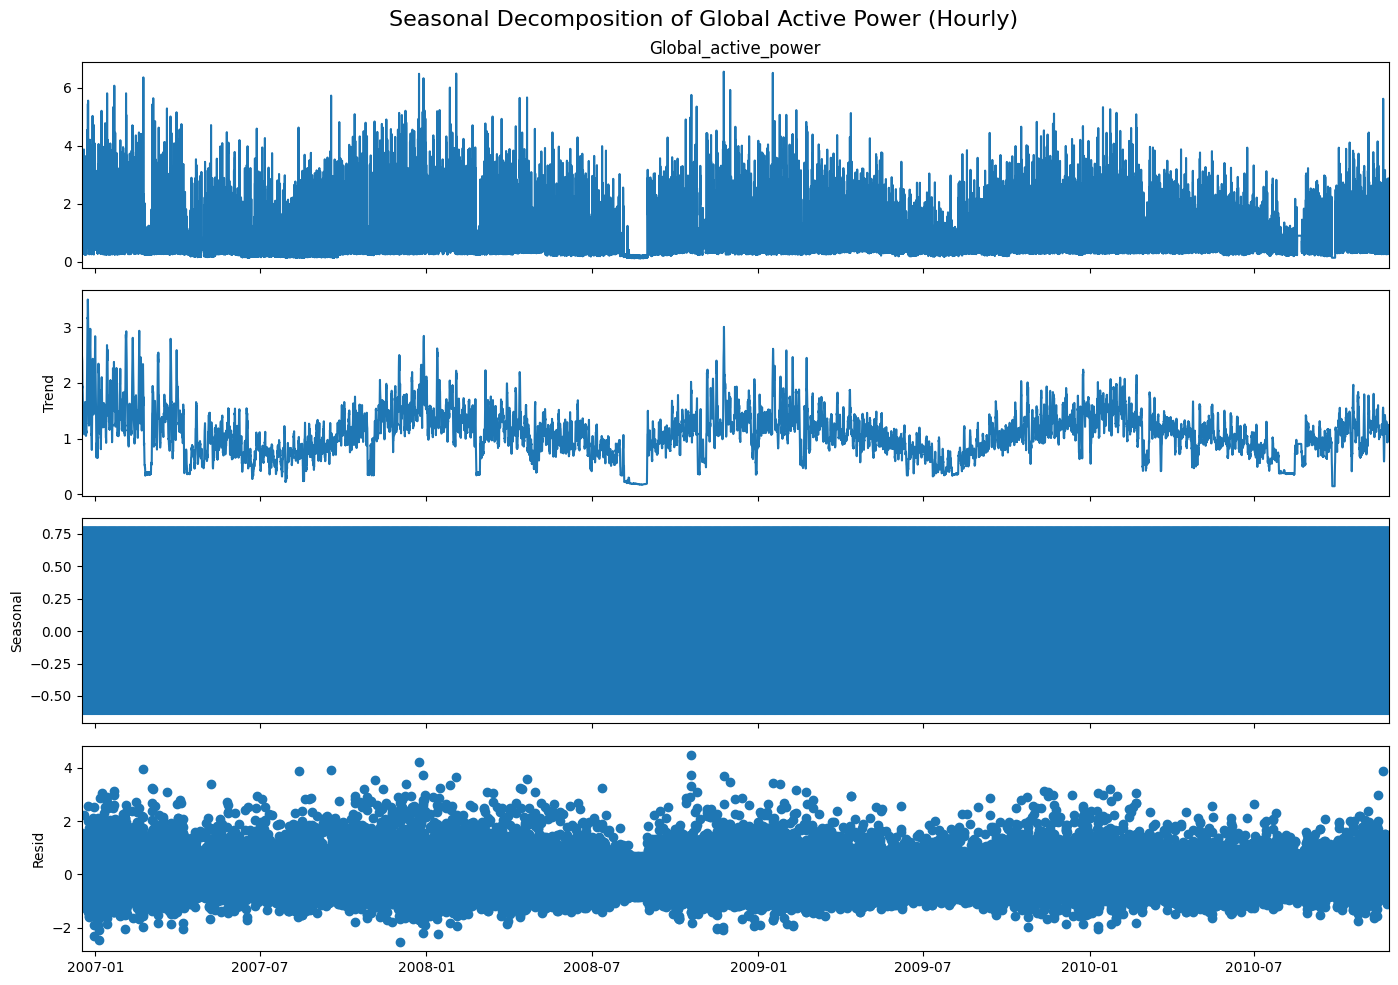

In [10]:

# Decompose the series
decomposition = seasonal_decompose(df_hourly, model='additive')  # or 'multiplicative'

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.suptitle('Seasonal Decomposition of Global Active Power (Hourly)', fontsize=16)
plt.tight_layout()
plt.show()


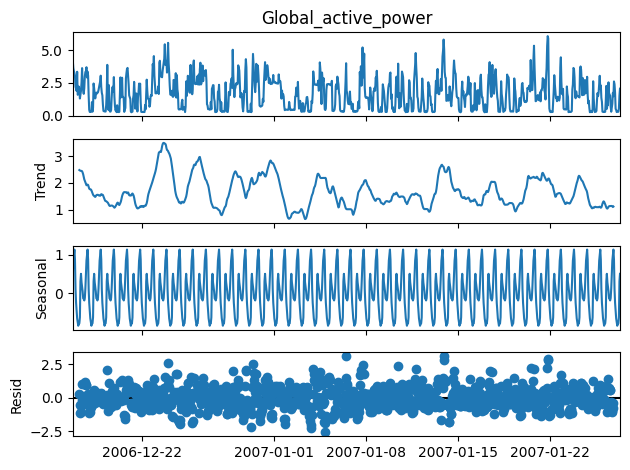

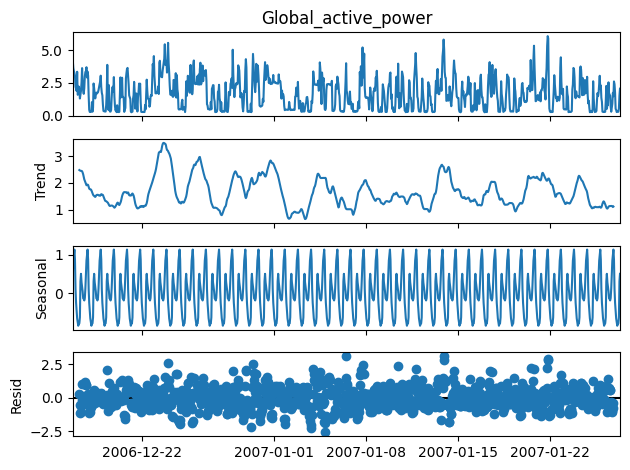

In [8]:
import statsmodels.api as sm

stl = sm.tsa.seasonal_decompose(df_hourly[:1000], model='additive', period=24)
stl.plot()

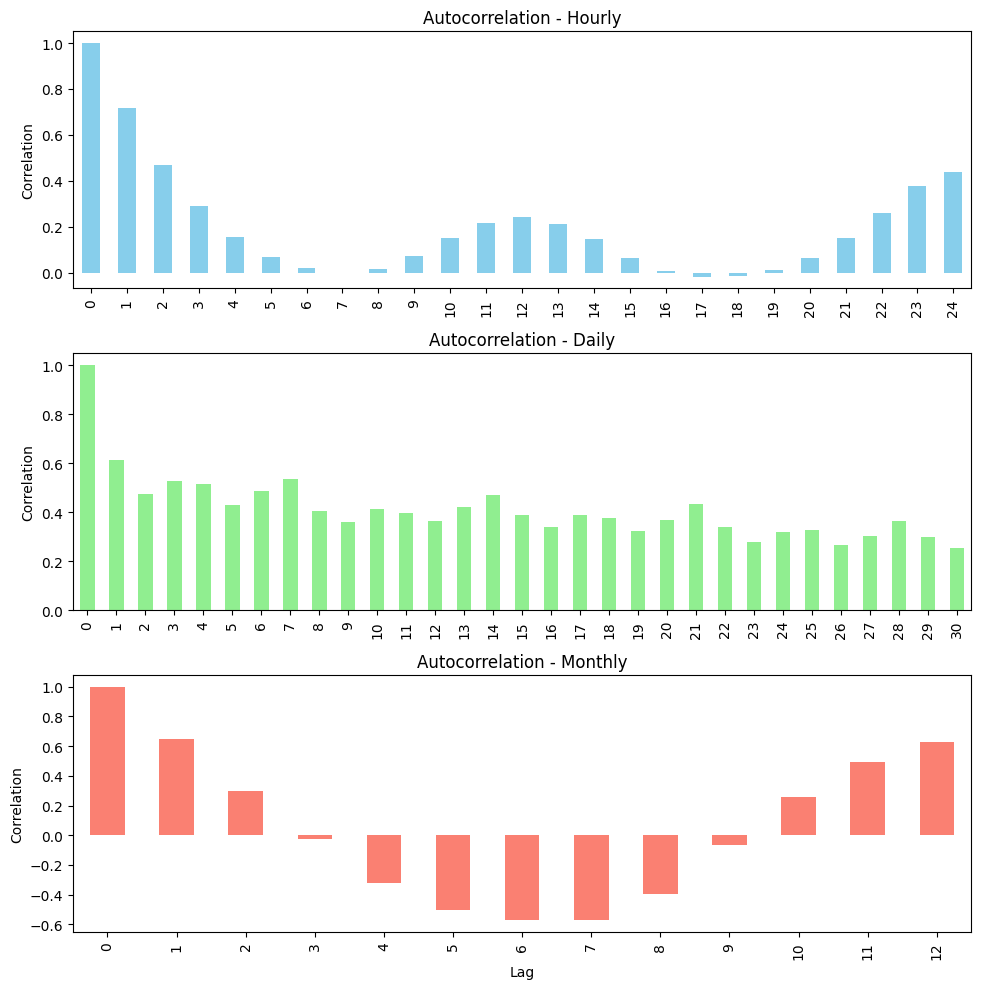

In [9]:
#ACF plot for diff resampled data

# autocorr_daily = pd.Series(acf(df_hourly, nlags=30))
# autocorr_hourly = pd.Series(acf(df_daily, nlags=24))
# autocorr_monthly = pd.Series(acf(df_monthly, nlags=12))

# plt.figure(figsize=(12, 6))
# autocorr_hourly.plot(kind='bar', title="Autocorrelation of Hourly Series")
# autocorr_daily.plot(kind='bar', title="Autocorrelation of Daily Series")
# autocorr_monthly.plot(kind='bar', title="Autocorrelation of Monthly Series")
# plt.xlabel("Lag")
# plt.ylabel("Correlation")
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()


autocorr_hourly = pd.Series(acf(df_hourly, nlags=24))
autocorr_daily = pd.Series(acf(df_daily, nlags=30))
autocorr_monthly = pd.Series(acf(df_monthly, nlags=12))

fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=False)

autocorr_hourly.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Autocorrelation - Hourly')
axes[0].set_ylabel('Correlation')

autocorr_daily.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Autocorrelation - Daily')
axes[1].set_ylabel('Correlation')

autocorr_monthly.plot(kind='bar', ax=axes[2], color='salmon')
axes[2].set_title('Autocorrelation - Monthly')
axes[2].set_xlabel('Lag')
axes[2].set_ylabel('Correlation')

plt.tight_layout()
plt.show()

In [8]:
#Train test split

train_size = len(df_hourly) - 48
train, test = df_hourly[:train_size], df_hourly[train_size:]

In [30]:
from scipy.stats import boxcox
import numpy as np

# Make sure all values are positive
train_pos = train + 1e-6  # small offset to avoid zero

# Apply Box-Cox transformation
train_boxcox, fitted_lambda = boxcox(train_pos)

# Convert back to a Series (optional, keeps the index)
train_boxcox = pd.Series(train_boxcox, index=train.index)

print("Optimal lambda:", fitted_lambda)


Optimal lambda: -0.040057519820779965


In [16]:
#Basic ARIMA model
model = ARIMA(train, order=(1,1,1))  
model_fit = model.fit()

/Users/sreeja/Documents/Time-Series/.venv/lib/python3.9/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: divide by zero encountered in matmul
  return _core_matmul(x1, x2)
/Users/sreeja/Documents/Time-Series/.venv/lib/python3.9/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: overflow encountered in matmul
  return _core_matmul(x1, x2)
/Users/sreeja/Documents/Time-Series/.venv/lib/python3.9/site-packages/numpy/linalg/_linalg.py:3220: RuntimeWarning: invalid value encountered in matmul
  return _core_matmul(x1, x2)
/Users/sreeja/Documents/Time-Series/.venv/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


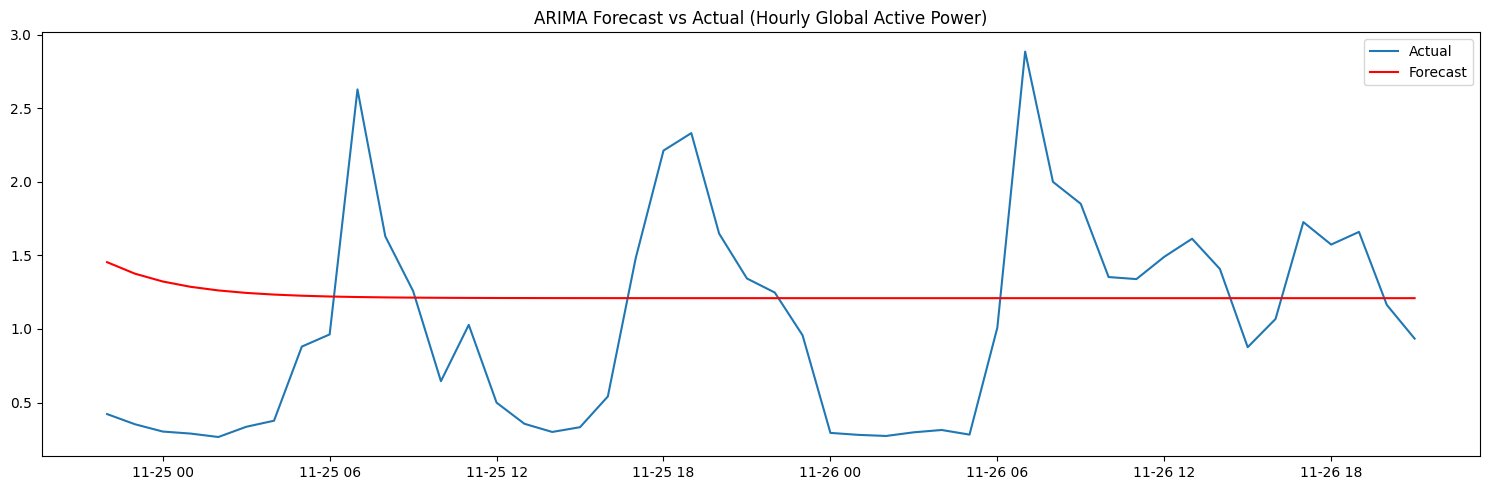

In [17]:
#Forecasting
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(15,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (Hourly Global Active Power)')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
#Evaluating forecast

mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

MAE: 0.6131, RMSE: 0.7268


In [18]:
#SARIMA Model

model = SARIMAX(train, 
                order=(2, 1, 2),         
                seasonal_order=(1, 1, 1, 24))  
model_fit = model.fit()
model_fit.summary()

/Users/sreeja/Documents/Time-Series/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                  Global_active_power   No. Observations:                34541
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 24)   Log Likelihood              -29185.380
Date:                              Sun, 31 Aug 2025   AIC                          58384.759
Time:                                      17:57:00   BIC                          58443.904
Sample:                                  12-16-2006   HQIC                         58403.611
                                       - 11-24-2010                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1027      0.097     -1.055      0.292      -0.294       0.088
ar.L2          0.4260      0.061      6.961      0.000       0.306       0.546
ma.L1         -0.2674      0.096     -2.779      0.005      -0.456      -0.079
ma.L2         -0.7192      0.096     -7.528      0.000      -0.906      -0.532
ar.S.L24       0.0375      0.005      7.955      0.000       0.028       0.047
ma.S.L24      -0.9636      0.001   -750.517      0.000      -0.966      -0.961
sigma2         0.3172      0.001    219.190      0.000       0.314       0.320
===================================================================================
Ljung-Box (L1) (Q):                   0.45   Jarque-Bera (JB):             23836.35
Prob(Q):                              0.50   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#SARIMA Model with boxcox

model = SARIMAX(train_boxcox, 
                order=(2, 1, 2),         
                seasonal_order=(1, 1, 1, 24))  
model_fit = model.fit()
model_fit.summary()

/Users/sreeja/Documents/Time-Series/.venv/lib/python3.13/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                34541
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 24)   Log Likelihood              -25275.428
Date:                              Sun, 31 Aug 2025   AIC                          50564.855
Time:                                      18:57:40   BIC                          50624.000
Sample:                                  12-16-2006   HQIC                         50583.707
                                       - 11-24-2010                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3569      0.007    -50.399      0.000      -0.371      -0.343
ar.L2          0.6160      0.006    102.850      0.000       0.604       0.628
ma.L1      -1.808e-05      0.005     -0.003      0.997      -0.010       0.010
ma.L2         -0.9759      0.005   -187.190      0.000      -0.986      -0.966
ar.S.L24       0.0688      0.005     13.276      0.000       0.059       0.079
ma.S.L24      -0.9726      0.001   -772.769      0.000      -0.975      -0.970
sigma2         0.2527      0.002    145.770      0.000       0.249       0.256
===================================================================================
Ljung-Box (L1) (Q):                  12.88   Jarque-Bera (JB):               840.92
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.75   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
forecast_boxcox = model_fit.get_forecast(steps=len(test))
pred_mean_boxcox = forecast_boxcox.predicted_mean
conf_int_boxcox = forecast_boxcox.conf_int()


In [37]:
from scipy.special import inv_boxcox

pred_mean = inv_boxcox(pred_mean_boxcox, fitted_lambda)
conf_int_lower = inv_boxcox(conf_int_boxcox.iloc[:,0], fitted_lambda)
conf_int_upper = inv_boxcox(conf_int_boxcox.iloc[:,1], fitted_lambda)


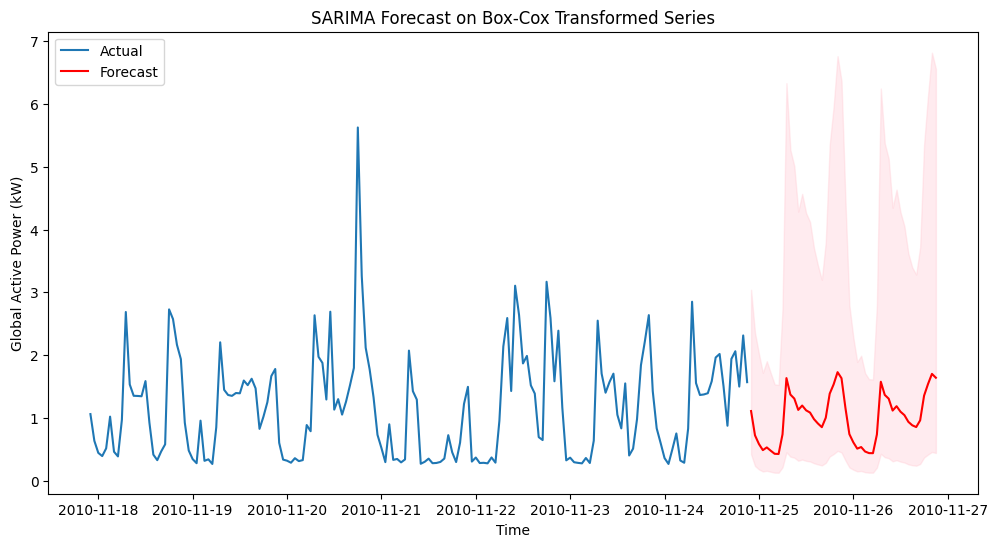

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(train.index[-7*24:], inv_boxcox(train_boxcox[-7*24:], fitted_lambda), label='Actual')  # last week
plt.plot(pred_mean.index, pred_mean, color='red', label='Forecast')
plt.fill_between(pred_mean.index, conf_int_lower, conf_int_upper, color='pink', alpha=0.3)
plt.title("SARIMA Forecast on Box-Cox Transformed Series")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()


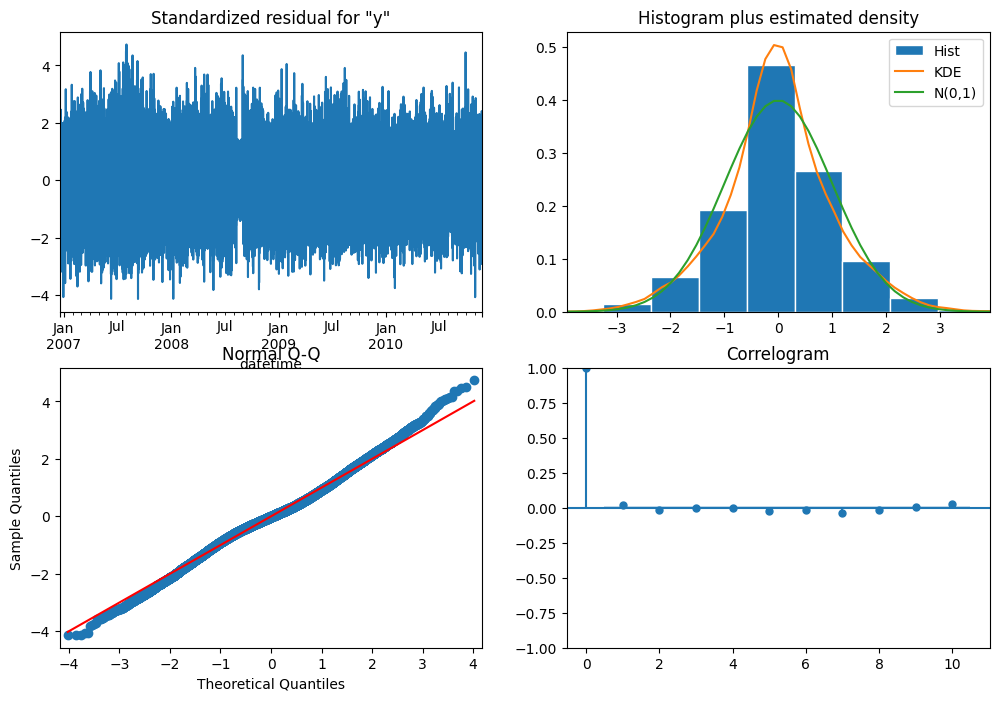

In [39]:
residuals = model_fit.resid

# Plot diagnostics
model_fit.plot_diagnostics(figsize=(12,8))
plt.show()

In [14]:
import itertools
import warnings
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX

warnings.filterwarnings("ignore")

def sarima_grid_search(train, pdq, seasonal_pdq, s):
    """
    Perform grid search to find best SARIMA parameters based on AIC.
    
    Parameters:
        train (pd.Series): Time series data (training set).
        pdq (list of tuples): (p,d,q) parameter combinations.
        seasonal_pdq (list of tuples): (P,D,Q) seasonal parameter combinations.
        s (int): Season length (e.g., 24 for daily seasonality in hourly data).
    
    Returns:
        results (pd.DataFrame): Sorted table of parameter sets and AIC values.
    """
    results = []

    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                model = SARIMAX(train,
                                order=param,
                                seasonal_order=(param_seasonal[0],
                                                param_seasonal[1],
                                                param_seasonal[2],
                                                s),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
                model_fit = model.fit(disp=False)
                results.append([param, param_seasonal, model_fit.aic])
            except:
                continue
    
    results_df = pd.DataFrame(results, columns=['pdq','seasonal_pdq','AIC'])
    return results_df.sort_values(by='AIC').reset_index(drop=True)


In [ ]:
# Define parameter ranges
p = d = q = range(0, 3)       # (0,1,2)
pdq = list(itertools.product(p, d, q))

P = D = Q = range(0, 2)       # (0,1)
seasonal_pdq = list(itertools.product(P, D, Q))

# Run grid search
best_models = sarima_grid_search(train, pdq, seasonal_pdq, s=24)

print(best_models.head())  # Top 5 models with lowest AIC


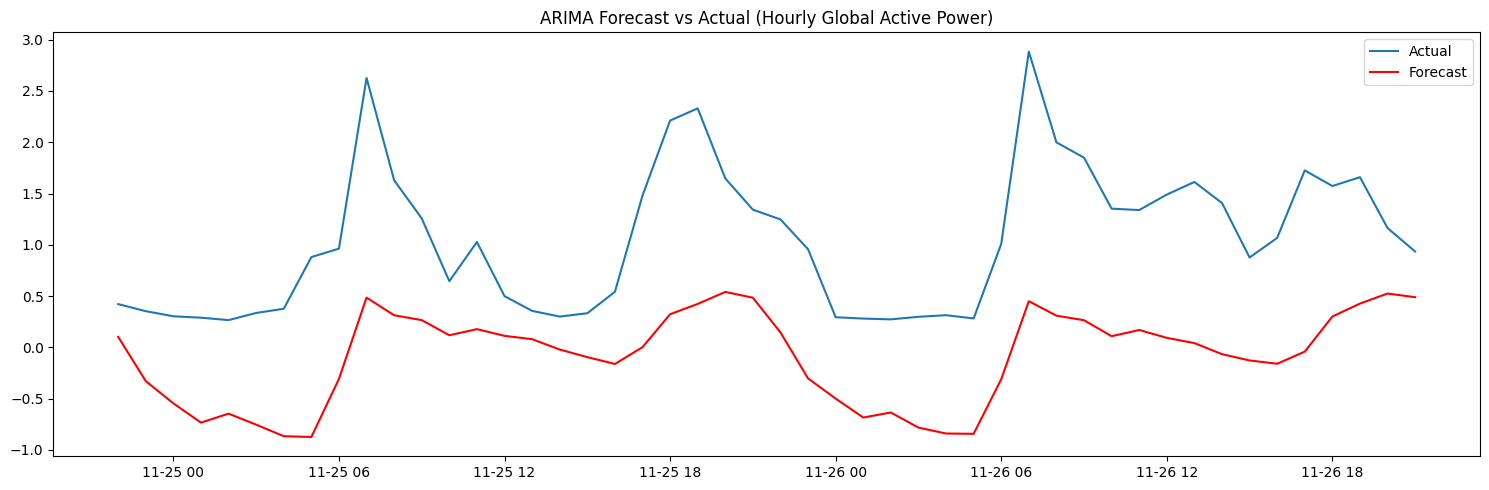

In [34]:
#Forecasting
forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(15,5))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (Hourly Global Active Power)')
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
mse = mean_squared_error(test, forecast)
mae = mean_absolute_error(test, forecast)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

MAE: 0.3882, RMSE: 0.4689


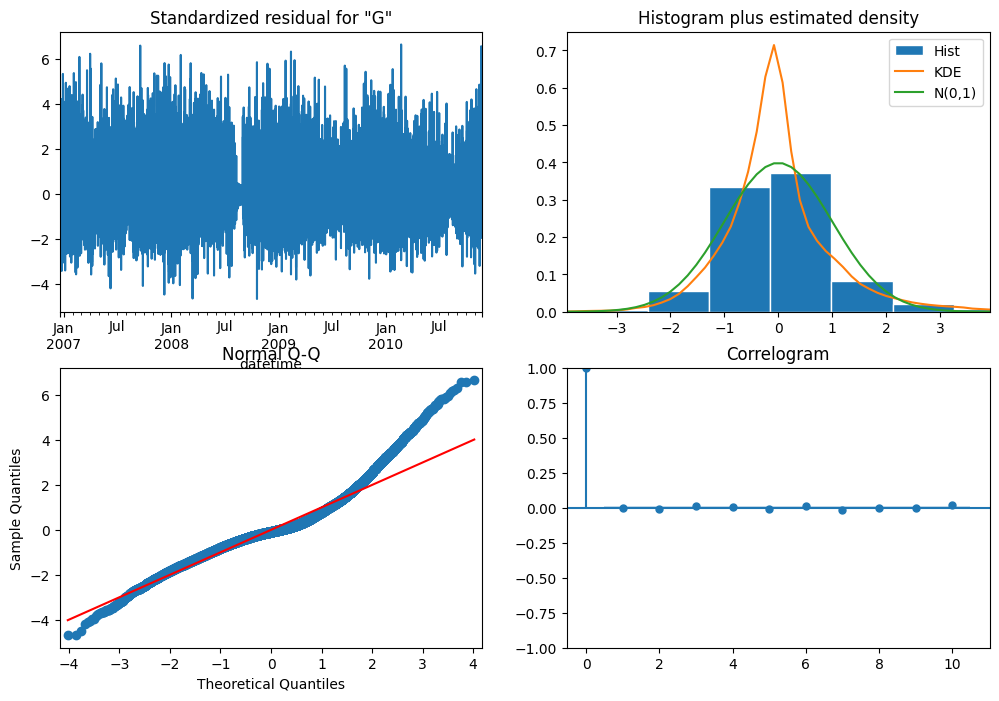

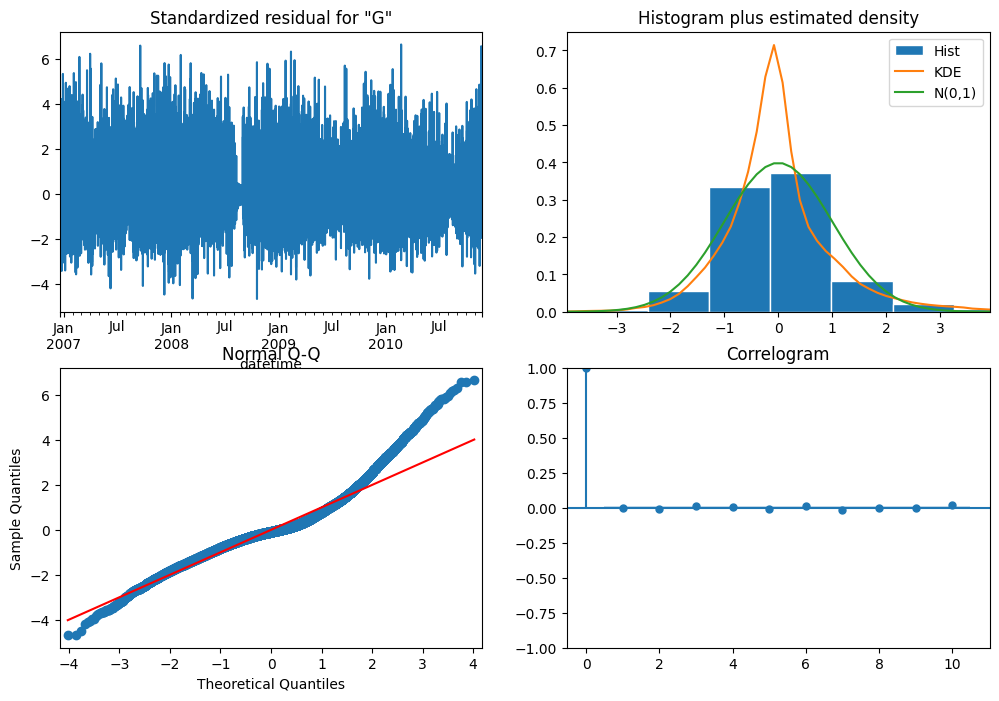

In [21]:
model_fit.plot_diagnostics(figsize=(12,8))


### LSTM

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Use original or Box-Cox transformed series
series = train.values.reshape(-1,1)  # shape (n,1)

# Scale data to 0-1 (important for LSTM)
scaler = MinMaxScaler()
series_scaled = scaler.fit_transform(series)


In [41]:
def create_sequences(data, n_input=24, n_output=1):
    X, y = [], []
    for i in range(len(data)-n_input-n_output+1):
        X.append(data[i:i+n_input])
        y.append(data[i+n_input:i+n_input+n_output])
    return np.array(X), np.array(y)

n_input = 24  # past 24 hours
X, y = create_sequences(series_scaled, n_input)


In [42]:
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(50, activation='tanh', input_shape=(n_input, 1)))
model.add(Dense(1))  # predicting 1 step ahead
model.compile(optimizer='adam', loss='mse')

# Early stopping to prevent overfitting
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_split=0.1, 
                    epochs=50, 
                    batch_size=32, 
                    callbacks=[es])


Epoch 1/50


/Users/sreeja/Documents/Time-Series/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


777/777 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0112 - val_loss: 0.0103
Epoch 2/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0096 - val_loss: 0.0102
Epoch 3/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0094 - val_loss: 0.0100
Epoch 4/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0089 - val_loss: 0.0100
Epoch 5/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0087 - val_loss: 0.0095
Epoch 6/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0087 - val_loss: 0.0093
Epoch 7/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0086 - val_loss: 0.0093
Epoch 8/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0086 - val_loss: 0.0090
Epoch 9/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0086 - val_loss: 0.0090
Epoch 10/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0085 - val_loss: 0.0093
Epoch 11/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0085 - val_loss: 0.0091
Epoch 12/50
777/777 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.

In [46]:
y_pred_scaled = model.predict(X_test)

# If y_pred_scaled has shape (samples, 1, 1)
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)
y_pred = scaler.inverse_transform(y_pred_scaled_2d)

# Similarly for y_test
y_test_2d = y_test.reshape(-1, 1)
y_true = scaler.inverse_transform(y_test_2d)


216/216 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step


In [50]:
y_pred = y_pred.flatten()
y_true = y_true.flatten()

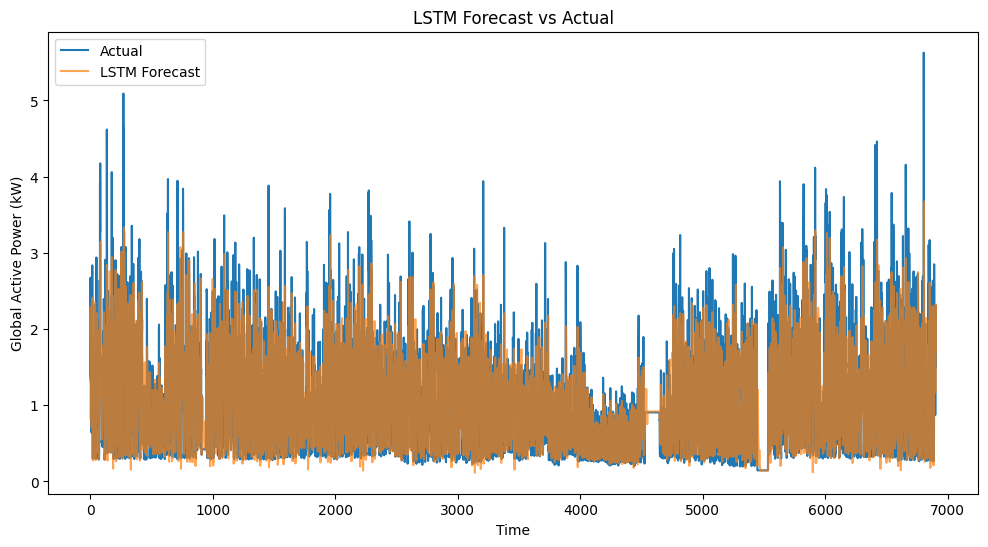

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='LSTM Forecast', alpha=0.7)
plt.title("LSTM Forecast vs Actual")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()


In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
print(f" MAE: {mae:.3f}")


 MAE: 0.341


In [52]:
import pandas as pd

# Suppose forecasted series is in a Pandas Series: y_pred_series
peak_threshold = np.quantile(y_pred, 0.95)  # top 5% of load
peak_hours = y_pred[y_pred >= peak_threshold]
print("Number of peak hours:", len(peak_hours))


Number of peak hours: 346
